In [1]:
import pandas as pd 
df = pd.read_csv('Housing.csv')

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# !pip install dataprep --quiet
# from dataprep.eda import plot,plot_correlation,plot_missing,plot_diff,create_report
# plot(df,"total_bedrooms")

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df = df.dropna()  

In [7]:
df = df.drop(columns=['ocean_proximity'])

In [8]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(mse)

4838057779.640016


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(mse)



0.0


In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred)
    y_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    print(name, "mse_train:", mse_train,"mse_test:",mse_test)



Linear Regression mse_train: 4817977906.765841 mse_test: 4921881237.628141
Decision Tree mse_train: 0.0 mse_test: 4723808755.314901


<Axes: ylabel='None'>

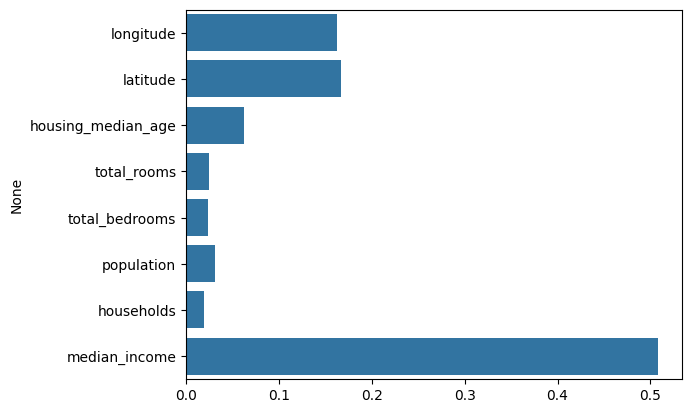

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)
model.feature_importances_
import seaborn as sns 
sns.barplot(y=X.columns, x=model.feature_importances_)

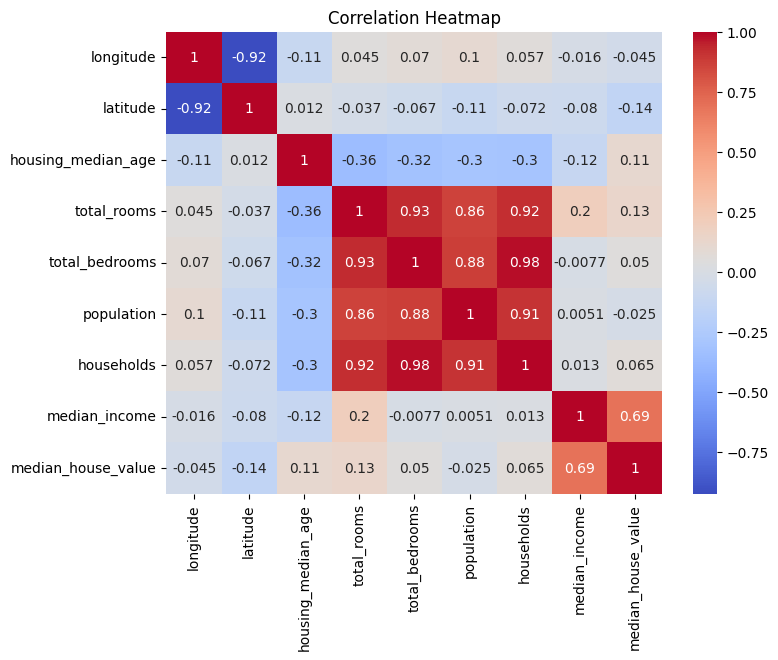

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [15]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [16]:
X['avg_rooms'] = X['total_rooms'] / X['households']
X['avg_bedrooms'] = X['total_bedrooms'] / X['households']

In [17]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'avg_rooms', 'avg_bedrooms'],
      dtype='object')

In [18]:
X = X.drop(['total_rooms','total_bedrooms'], axis=1)

In [19]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'population',
       'households', 'median_income', 'avg_rooms', 'avg_bedrooms'],
      dtype='object')

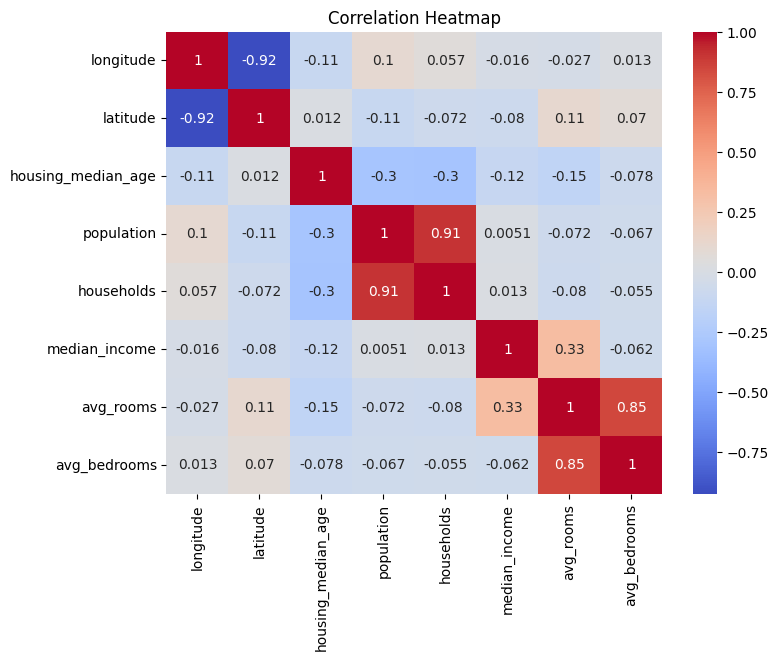

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
import pandas as pd 
df = pd.read_csv('Housing.csv')
df = df.dropna()  


In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [24]:
weights = {
    'ISLAND': 5,
    'NEAR OCEAN': 4,
    'NEAR BAY': 3,
    '<1H OCEAN': 2,
    'INLAND': 1
}

df['ocean_proximity_encoded'] = df['ocean_proximity'].map(weights)
df.drop(columns=['ocean_proximity'], inplace=True) 

<Axes: ylabel='None'>

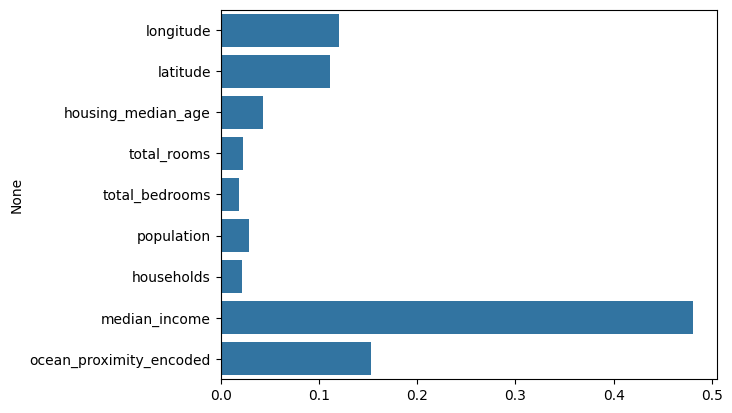

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)
model.feature_importances_
import seaborn as sns 
sns.barplot(y=X.columns, x=model.feature_importances_)

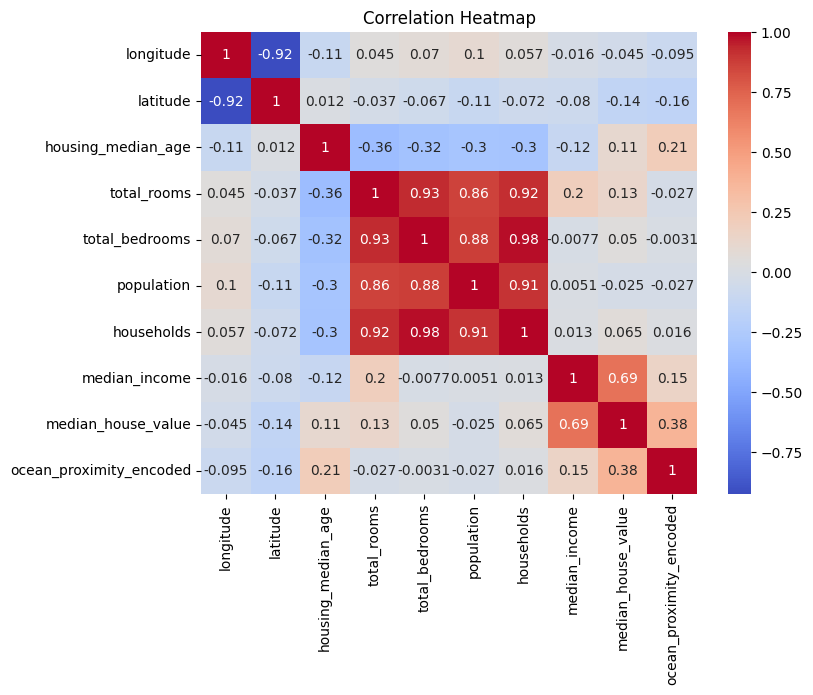

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_encoded'],
      dtype='object')

In [29]:
X = df.drop('median_house_value', axis=1)
X = X.drop(['longitude','latitude'], axis=1)    
y = df['median_house_value']


In [30]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred)
    y_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    print(name, "mse_train:", mse_train,"mse_test:",mse_test)



Linear Regression mse_train: 5194149537.213384 mse_test: 5218557045.005033
Decision Tree mse_train: 0.0 mse_test: 7180907226.181062


In [ ]:
Linear Regression mse_train: 4817977906.765841 mse_test: 4921881237.628141
Decision Tree mse_train: 0.0 mse_test: 4723808755.314901


In [32]:
5194149537.213384>4817977906

True

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv('Housing.csv')
df = df.dropna()  
weights = {
    'ISLAND': 5,
    'NEAR OCEAN': 4,
    'NEAR BAY': 3,
    '<1H OCEAN': 2,
    'INLAND': 1
}

df['ocean_proximity_encoded'] = df['ocean_proximity'].map(weights)
df.drop(columns=['ocean_proximity'], inplace=True) 

X = df.drop('median_house_value', axis=1)
# X = X.drop(['longitude','latitude'], axis=1)    
y = df['median_house_value']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])



# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Results
print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2)
print("RMSE:", rmse)

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv('Housing.csv')
df = df.dropna()  
weights = {
    'ISLAND': 5,
    'NEAR OCEAN': 4,
    'NEAR BAY': 3,
    '<1H OCEAN': 2,
    'INLAND': 1
}

df['ocean_proximity_encoded'] = df['ocean_proximity'].map(weights)
df.drop(columns=['ocean_proximity'], inplace=True) 

X = df.drop('median_house_value', axis=1)
# X = X.drop(['longitude','latitude'], axis=1)    
y = df['median_house_value']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Hyperparameter grid for DecisionTreeRegressor
param_grid = {
    'regressor__max_depth': [3, 5, 10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': [None, 'sqrt', 'log2']
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Results
print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2)
print("RMSE:", rmse)

Best Parameters: {'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}
R2 Score: 0.7418327228975395
RMSE: 59417.877675141484
